In [1]:
from datasets import load_dataset

dataset = load_dataset('mispeech/speechocean762')

In [2]:
hf_dataset = dataset.remove_columns(["prosodic" , "completeness" ,"words" , "total" , "speaker" , "gender" , "age"])

In [3]:
hf_dataset

DatasetDict({
    train: Dataset({
        features: ['accuracy', 'fluency', 'text', 'audio'],
        num_rows: 2500
    })
    test: Dataset({
        features: ['accuracy', 'fluency', 'text', 'audio'],
        num_rows: 2500
    })
})

In [4]:
def display_random_samples(dataset, split='train', num_samples=3):
    if 'text' in dataset[split].column_names:
        text_samples = dataset[split]['text']
        random_samples = random.sample(text_samples, num_samples)
        for i, sample in enumerate(random_samples, 1):
            print(f"Sample {i}: {sample}")
    else:
        print("The 'text' column does not exist in the dataset.")

In [5]:
import random
display_random_samples(hf_dataset)

Sample 1: YOU TRY NOT TO THINK ABOUT THOSE KIND OF THINGS
Sample 2: I WONDER WHAT WAS GOING ON OVER THERE.
Sample 3: WHY AM I A GHOST


In [6]:
import random
from IPython.display import Audio, display
import requests

def display_random_audio_samples(dataset, split='train', num_samples=3):
    if 'audio' in dataset[split].column_names:
        audio_samples = dataset[split]['audio']
        random_samples = random.sample(audio_samples, num_samples)
        for i, sample in enumerate(random_samples, 1):
            audio_array = sample['array']  # The actual audio array
            sample_rate = sample['sampling_rate']  # The sample rate
            print(f"Sample {i}:")
            display(Audio(audio_array, rate=sample_rate))
    else:
        print("The 'audio' column does not exist in the dataset.")

In [7]:
display_random_audio_samples(hf_dataset, split='train', num_samples=3)

Sample 1:


Sample 2:


Sample 3:


In [8]:
train_texts = dataset['train']['text']
train_labels_fluency = dataset['train']['fluency']

test_texts = dataset['test']['text']
test_labels_fluency = dataset['test']['fluency']

# Step 5: Print examples to verify
print("Training texts:", train_texts[:3])
print("Training fluency labels:", train_labels_fluency[:3])
print("Test texts:", test_texts[:3])
print("Test fluency labels:", test_labels_fluency[:3])

Training texts: ['WE CALL IT BEAR', 'ZERO THREE FIVE ONE', 'THREE TWO TWO SEVEN']
Training fluency labels: [9, 9, 10]
Test texts: ['MARK IS GOING TO SEE ELEPHANT', 'KATE LOVES CHINA', 'TWO SIX FOUR EIGHT']
Test fluency labels: [9, 9, 9]


C:\Users\maste\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


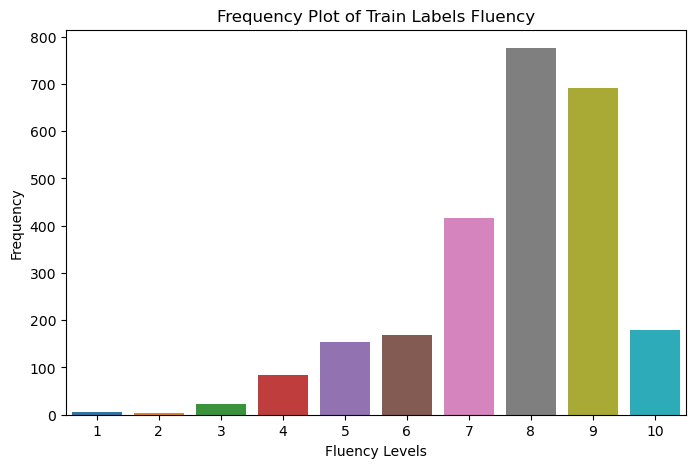

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count frequencies of each value
freq = Counter(train_labels_fluency)

# Convert frequencies to lists
labels, counts = zip(*freq.items())

# Plotting the frequencies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(labels), y=list(counts))
plt.xlabel('Fluency Levels')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Train Labels Fluency')
plt.show()

In [ ]:
from transformers import DistilBertTokenizer

# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize the text
def preprocess_function(examples):
    tokenized_inputs = tokenizer(examples['transcription'], max_length=512, truncation=True, padding='max_length')
    tokenized_inputs['labels'] = examples['Fluency']
    return tokenized_inputs


tokenized_datasets = dataset.map(preprocess_function, batched=True)

In [11]:
from datasets import load_dataset

dataset = load_dataset('mispeech/speechocean762', split='all')
print(dataset)

Dataset({
    features: ['accuracy', 'completeness', 'fluency', 'prosodic', 'text', 'total', 'words', 'speaker', 'gender', 'age', 'audio'],
    num_rows: 5000
})
